In [1]:
import pandas as pd
import matplotlib
import numpy as np

%matplotlib inline

from datetime import datetime 

#Defining magic command 
pd.set_option('display.max_rows',500)

## CRISP-DM

![CRISP-DM.jpg](../reports/figures/CRISP-DM.jpg)

# Data Preparation

* Focus always to understand final data structure
* Support each step by visual analytics
* 

### John Hopkins GITHUB csv data

#### Manual Data gathering

git clone/pull "https://github.com/CSSEGISandData/COVID-19" in conda prompt  

## Small Data set

In [2]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,981,989,989,989,1005,1005,1024,1024,1045,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134


In [4]:
time_idx = pd_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
country_list = ['Germany', 
                'US', 
                'India',
                'Brazil',
                'Spain',
                'Japan'
                ]
country_list

['Germany', 'US', 'India', 'Brazil', 'Spain', 'Japan']

In [7]:
for each in country_list:
    df_plot[each] =np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [8]:
df_plot.tail()

,date,Germany,US,India,Brazil,Spain,Japan
209,8/18/20,228120,5482416,2767253,3407354,364196,57636
210,8/19/20,229706,5529824,2836925,3456652,370867,58728
211,8/20/20,231292,5573847,2905825,3501975,377906,59900
212,8/21/20,233029,5622540,2975701,3532330,386054,60949
213,8/22/20,233861,5667112,3044940,3582362,386054,61916


C:\Users\Vishal Sharbidar\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

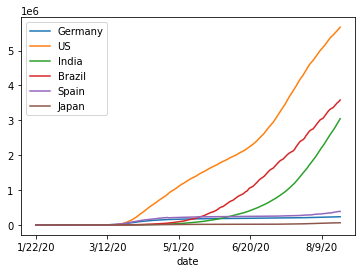

In [9]:
df_plot.set_index('date').plot()

## SIR data

In [10]:
sir_plot = pd.DataFrame({
    'date':time_idx})
sir_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [11]:
sir_arr= pd_raw['Country/Region'].unique()
sir_list = sir_arr.tolist()
sir_arr

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [12]:
for each in sir_list:
    sir_plot[each] =np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
sir_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


In [13]:
sir_plot= sir_plot.drop(columns = ['Taiwan*', 'South Sudan', 'Guyana','Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland',
                                   'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Korea, South', 'Kosovo','Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Luxembourg', 'MS Zaandam', 'Madagascar', 'Malawi',
       'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius',
       'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco',
       'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Niger', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Peru', 'Philippines'])


In [14]:
time_idx = [datetime.strptime(each, "%m/%d/%y") for each in sir_plot.date] #to convert all the dates into datetime 
time_str= [each.strftime('%Y-%m-%d') for each in time_idx] #to convert datetime function to string
time_str[0:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [15]:
sir_plot.to_csv('C:/Users/Vishal Sharbidar/Desktop/ADS_COVID-19/ads_covid-19/data/processed/COVID_sir_flat_table.csv', sep=';',index=False)
#Storing the processed data file and sep';' is a seperator [German std]

## Data Type Date

In [16]:
df_plot.tail()

,date,Germany,US,India,Brazil,Spain,Japan
209,8/18/20,228120,5482416,2767253,3407354,364196,57636
210,8/19/20,229706,5529824,2836925,3456652,370867,58728
211,8/20/20,231292,5573847,2905825,3501975,377906,59900
212,8/21/20,233029,5622540,2975701,3532330,386054,60949
213,8/22/20,233861,5667112,3044940,3582362,386054,61916


To convert date-str function into date function 

In [17]:
time_idx = [datetime.strptime(each, "%m/%d/%y") for each in df_plot.date] #to convert all the dates into datetime 
time_str= [each.strftime('%Y-%m-%d') for each in time_idx] #to convert datetime function to string
time_str[0:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [18]:
df_plot.to_csv('C:/Users/Vishal Sharbidar/Desktop/ADS_COVID-19/ads_covid-19/data/processed/COVID_small_flat_table.csv', sep=';',index=False)
#Storing the processed data file and sep';' is a seperator [German std]

## Relational data model - defining a primary key
In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)

A primary key’s main features are:

It must contain a unique value for each row of data.
It cannot contain null values.

In [19]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,981,989,989,989,1005,1005,1024,1024,1045,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134


In [20]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'COUNTRY',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [21]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)


In [22]:
pd_relational_model=pd_data_base.set_index(['state','COUNTRY']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,COUNTRY,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [23]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

## Data for World map

In [24]:
df_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

In [25]:
df_fil = df_code.set_index('COUNTRY').rename(index={'United States':'US'}).drop('GDP (BILLIONS)', axis=1)
df_fil.tail()

,CODE
COUNTRY,
Virgin Islands,VGB
West Bank,WBG
Yemen,YEM
Zambia,ZMB
Zimbabwe,ZWE


In [26]:
df_input_large= pd_raw['Country/Region'].unique()
for each in df_input_large:
        df_plot[each] =np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
df = df_plot.drop('date', axis=1)
df.tail()

,Germany,US,India,Brazil,Spain,Japan,Afghanistan,Albania,Algeria,Andorra,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
209,228120,5482416,2767253,3407354,364196,57636,37599,7654,39444,1005,...,322177,1485,36352,35697,989,17306,10,1889,9981,5378
210,229706,5529824,2836925,3456652,370867,58728,37599,7812,39847,1024,...,323008,1493,37112,36868,994,17606,10,1892,10218,5643
211,231292,5573847,2905825,3501975,377906,59900,37856,7967,40258,1024,...,324203,1506,37547,37567,1007,17989,10,1899,10372,5745
212,233029,5622540,2975701,3532330,386054,60949,37894,8119,40667,1045,...,325263,1516,38074,38219,1009,18313,10,1906,10627,5815
213,233861,5667112,3044940,3582362,386054,61916,37953,8275,41068,1045,...,326595,1521,38532,38957,1014,18476,10,1907,10831,5893


In [27]:
#Merging the data set over COUNTRY for CODE column
world_raw =  pd.DataFrame({"COUNTRY" : df_input_large, "Confirm cases" :df.iloc[-1]})
world_raw.set_index('COUNTRY').tail()

,Confirm cases
COUNTRY,
West Bank and Gaza,18476
Western Sahara,10
Yemen,1907
Zambia,10831
Zimbabwe,5893


In [28]:
df = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/08-22-2020.csv'
pd_raw=pd.read_csv(df)
data = pd_raw.drop({'FIPS', 'Confirmed', 'Admin2','Province_State', 'Last_Update', 'Lat', 'Long_', 'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'}, axis=1).rename(columns={'Country_Region':'COUNTRY'}).set_index('COUNTRY')
data.head()

,Deaths,Recovered,Active
COUNTRY,,,
Afghanistan,1385,28016,8552.0
Albania,245,4184,3846.0
Algeria,1424,28874,10770.0
Andorra,53,875,117.0
Angola,94,814,1226.0


In [29]:
world = pd.merge(df_fil, world_raw, on = "COUNTRY").set_index('COUNTRY')
world.head()

,CODE,Confirm cases
COUNTRY,,
Afghanistan,AFG,233861
Albania,ALB,5667112
Algeria,DZA,3044940
Andorra,AND,3582362
Angola,AGO,386054


In [44]:
world_con = pd.merge(world, data, on = "COUNTRY").reset_index()
world_con

,COUNTRY,CODE,Confirm cases,Deaths,Recovered,Active
0,Afghanistan,AFG,233861,1385,28016,8552.0
1,Albania,ALB,5667112,245,4184,3846.0
2,Algeria,DZA,3044940,1424,28874,10770.0
3,Andorra,AND,3582362,53,875,117.0
4,Angola,AGO,386054,94,814,1226.0
...,...,...,...,...,...,...
3932,Venezuela,VEN,38957,323,28453,10181.0
3933,Vietnam,VNM,1014,26,563,425.0
3934,Yemen,YEM,1907,546,1066,295.0
3935,Zambia,ZMB,10831,279,9942,610.0


In [45]:
world_con.to_csv('../data/processed/COVID_CRD.csv',sep=';',index=False)

### Johns Hopkins data set for the state information US 

In [32]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1196,1196,1206,1218,1219,1235,1241,1240,1255,1264
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,3744,3791,3839,3877,3888,3906,3931,3957,3997,4037
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,586,590,598,604,605,606,613,619,622,626
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,457,465,469,469,474,476,490,494,501,503
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,835,848,854,860,863,887,901,912,930,931


In [33]:
# drop all non relevant fields! 
# Many of this fields do not belong to 
# a transactional data. These fields belong to so called master data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [34]:
## the stack command has problems when only one information is available within a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['COUNTRY']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,COUNTRY
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


In [35]:
pd_relational_model_all=pd_relational_model[pd_relational_model['COUNTRY']!='US'].reset_index(drop=True)

In [36]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [37]:
pd_relational_model_final = pd.merge(pd_relational_model_all, df_code, on = "COUNTRY").drop('GDP (BILLIONS)', axis=1)

In [38]:
pd_relational_model_final.to_csv('../data/processed/20200823_COVID_relational_confirmed.csv',sep=';',index=False)

## World population

In [39]:
pop='../data/raw/population/data/population.csv'
pop_raw = pd.read_csv(pop)
pop_raw = pop_raw.drop(columns = {'Country Code'})
pop_raw.head()

,Country Name,Year,Value
0,Arab World,1960,92197753
1,Arab World,1961,94724510
2,Arab World,1962,97334442
3,Arab World,1963,100034179
4,Arab World,1964,102832760


In [40]:
pop_raw.columns

Index(['Country Name', 'Year', 'Value'], dtype='object')

In [41]:
pop_data = pop_raw[pop_raw['Year']== 2018].iloc[45:]
pop_data = pop_data.rename(columns= {'Country Name':'COUNTRY'}).drop(columns = {'Year'}).set_index('COUNTRY').T
pop_data = pop_data.rename(columns = {'United States':'US'})

In [42]:
pop_final = pop_data.T.reset_index()
pop_final

,COUNTRY,Value
0,World,7594270356
1,Afghanistan,37172386
2,Albania,2866376
3,Algeria,42228429
4,American Samoa,55465
5,Andorra,77006
6,Angola,30809762
7,Antigua and Barbuda,96286
8,Argentina,44494502
9,Armenia,2951776


In [43]:
pop_final.to_csv('../data/processed/population.csv',sep=';',index=False)